# Trabalho 1 - Aprendizado de Máquina

## 1. Abrindo o dataset

In [1]:
import pandas as pd
import numpy as np

# Lendo o valor e colocando-o em um dataframe
dataset = pd.read_csv("koi_data.csv")
dataset

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,K08198.01,FALSE POSITIVE,373.89398,0.963,27.66000,730.0,0.03288,0.00771,2.51,0.8885,...,-1.000,-0.300,0.00060,0.00030,2.360,-0.990,2.550,2.370,-0.910,2.540
5198,K07984.01,FALSE POSITIVE,8.58987,0.765,4.80600,87.7,0.00936,0.18863,1.11,0.0779,...,1.100,1.200,-0.00008,-0.00010,1.260,-1.200,1.750,1.350,-1.300,1.840
5199,K07985.01,FALSE POSITIVE,0.52770,1.252,3.22210,1579.2,0.29763,0.16318,29.35,0.0128,...,0.792,-0.484,-0.00024,0.00018,2.132,-1.757,2.763,2.344,-1.756,2.929
5200,K07987.01,FALSE POSITIVE,0.68140,0.147,0.86500,103.6,0.00944,8.97692,1.07,0.0157,...,7.200,-5.600,-0.00072,0.00050,3.410,-3.650,5.000,3.380,-3.890,5.160


## 2. Pré processamento de dados

### 2.1. Normalização

É importante para um melhor resultado dos métodos apresentados aqui que haja algum tipo de normalização dos dados para evitar dificuldades desnecessárias para os modelos. Foram testados dois métodos de normalização: Min-Max Normalization e Z-Normalization e o ambos tiverem resultados bem parecidos.

In [2]:
from sklearn.preprocessing import StandardScaler

# Criando o normalizador que fará a Z-Normalization
scaler = StandardScaler()

# Normalizando os parâmentros de entrada
norm_ds = pd.DataFrame(scaler.fit_transform(dataset.iloc[:, 2:]), columns=dataset.columns[2:])

### 2.2. Transformando as classes em inteiros
Como os métodos apresentados aqui tem números como saidas esperadas, precisamos transformar os valores da coluna ```koi_disposition``` em inteiros para que possamos trabalhar em cima dela.

In [3]:
# Transformando as classificações 'CONFIRMED' e 'FALSE POSITIVE' em inteiros
norm_ds["koi_disposition"] = np.where(dataset['koi_disposition'] == 'CONFIRMED', 1, 0)

## 3. Definições de métodos para avaliação dos modelos

Os métodos definidos aqui serão de grande utilidade para facilitar os testes que serão feitos com cada um dos métodos.

### 3.1. Métodos para auxiliar a avaliação

Esses métodos nos auxiliarão a calcular as estatísticas para os métodos e suas variações.

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import KFold

# Função que a partir de um vetor de indices que indica quais os dados
# serão usados para treino/teste retorna os dados em sí de cada conjunto
def get_train_test_data(df, train, test):
    x_train = df.iloc[train, :41]
    x_test = df.iloc[test, :41]
    y_train = df.iloc[train, 41]
    y_test = df.iloc[test, 41]
    return x_train, x_test, y_train, y_test

# Gets the metrics for a single training fold
def evaluate_single_fold(model, x, y):
    y_pred = model.predict(x)
    y_pred_prob = model.predict_proba(x)[::,1]
    
    return {
        "accuracy": accuracy_score(y, y_pred),
        "recall": recall_score(y, y_pred),
        "precision": precision_score(y, y_pred),
        "f1": f1_score(y, y_pred),
        "roc": roc_curve(y, y_pred_prob),
        "auc": roc_auc_score(y, y_pred_prob)
    }

# Função que testa um modelo com diferentes hiper parametros usando
# o cross validation 5-fold. O valor de retorno é um dicionario com
# os valores de diferentes métricas avaliadas para cada fold.
def evaluate_model(model_class, params, dataset):
    # Define os folds para o cross validation
    kfold = KFold(n_splits=5)
    folds = kfold.split(dataset)
    
    # Dicionario de métricas
    scores = { "accuracy": [], "recall": [], "precision": [], "f1": [], "roc": [], "auc": [] }

    # Loop para cada fold
    for train_i, test_i in folds:
        # Particionando o dataset em teste e treino
        x_train, x_test, y_train, y_test = get_train_test_data(dataset, train_i, test_i)
        
        # Criando o modelo e treinando-o
        model = model_class(**params)        
        model.fit(x_train, y_train)
        
        # Calculando as métricas para esse modelo nesse fold
        model_metrics = evaluate_single_fold(model, x_test, y_test)
        
        # Salvando as métricas do modelo nesse fold
        scores["accuracy"].append(model_metrics["accuracy"])
        scores["recall"].append(model_metrics["recall"])
        scores["precision"].append(model_metrics["precision"])
        scores["f1"].append(model_metrics["f1"])
        scores["roc"].append(model_metrics["roc"])
        scores["auc"].append(model_metrics["auc"])
        
    return {
        "accuracy": np.array(scores["accuracy"]),
        "recall": np.array(scores["recall"]),
        "precision": np.array(scores["precision"]),
        "f1": np.array(scores["f1"]),
        "roc": scores["roc"],
        "auc": scores["auc"],
        "param": params
    }

# Função genérica para calcular as métricas de um modelo dado parâmetros
# variáveis ou não
def evaluate_model_variations(model_class, model_params, dataset):
    if model_params is None:
        return [evaluate_model(model_class, {}, dataset)]
    else:
        return [evaluate_model(model_class, p, dataset) for p in model_params]

### 3.2. Métodos para auxiliar a exibição de resultados

Esses métodos nos auxiliarão a mostrar as estatísticas coletadas de cada um dos métodos.

In [5]:
import matplotlib.pyplot as plt

# Funçao que retorna as métricas e o os parâmetros do modelo
# que conseguiu a melhor acurácia média entre todos aqueles
# experimentados
def get_best_accuracy_model_metrics(scores):
    best_acc = 0
    metrics = None
    for s in scores:
        s_acc = np.mean(s["accuracy"])
        if s_acc > best_acc:
            best_acc = s_acc
            metrics = s
    return metrics

# Plota mas métricas para um determinado experimento
def output_variations_info(scores, x_tick_labels=None, x_label=None):  
    stat_acc = np.array([s["accuracy"] for s in scores])
    stat_f1 = np.array([s["f1"] for s in scores])
    stat_auc = np.array([s["auc"] for s in scores])
    
    xs = np.linspace(0, stat_acc.shape[0] - 1, stat_acc.shape[0])
    
    errorbar_style = {"linestyle":"--", "linewidth":1, "markeredgewidth":2, "elinewidth":2, "capsize":3, "marker": "^"}
    plot_style = {"linestyle":"--", "linewidth":1, "markeredgewidth":2, "marker": "^"}
    
    fig = plt.figure(figsize=(16, 8))
    
    ax = [plt.subplot(2, 1, 1), plt.subplot(2, 2, 3), plt.subplot(2, 2, 4)]
    
    ax[0].errorbar(xs, stat_acc.mean(axis=1), stat_acc.std(axis=1), **errorbar_style, color="#e74c3c")
    ax[1].plot(xs, stat_f1.mean(axis=1), **plot_style, color="#2ecc71")
    ax[2].errorbar(xs, stat_auc.mean(axis=1), stat_auc.std(axis=1), **errorbar_style, color="#3498db")
    
    ax[0].set_title('Accuracy mean/std over 5 folds for each hyperparameter')
    ax[0].set_ylabel("Accuracy 5-fold average / std")
    
    ax[1].set_title('F1 mean over 5 folds for each hyperparameter')
    ax[1].set_ylabel("F1 5-fold average")
    
    ax[2].set_title('AUROC mean/std over 5 folds for each hyperparameter')
    ax[2].set_ylabel("AUROC 5-fold average / std")
    
    for i in range(len(ax)):
        ax[i].xaxis.set_ticks(xs)
        if x_tick_labels is not None: ax[i].set_xticklabels(x_tick_labels)
        if x_label is not None: ax[i].set_xlabel(x_label)
            
    plt.tight_layout()
    plt.show()
    
    metrics = get_best_accuracy_model_metrics(scores)
    print("Melhor accuracy médio entre os 5-folds:", np.mean(metrics["accuracy"]), "com params:", metrics["param"])

## 4. Aplicação dos diferentes modelos nos dados

Nessa seção, os métodos propostos pela atividade serão criados e testados contra os dados do dataset provido.

### 4.1. Naive Bayes

Esse é o método que será usado como baseline para todos os outros testes. Esse método utiliza o teorema de bayes para tentar descobrir qual a probabilidade de cada saída possível (no caso, se o exoplaneta é confirmado ou não) dado os dados de entrada. Com isso calculado a tarefa é só escolher aquela saída cuja probabilidade é maior. Para esse método, faremos apenas um teste e não alteraremos os parâmetros.

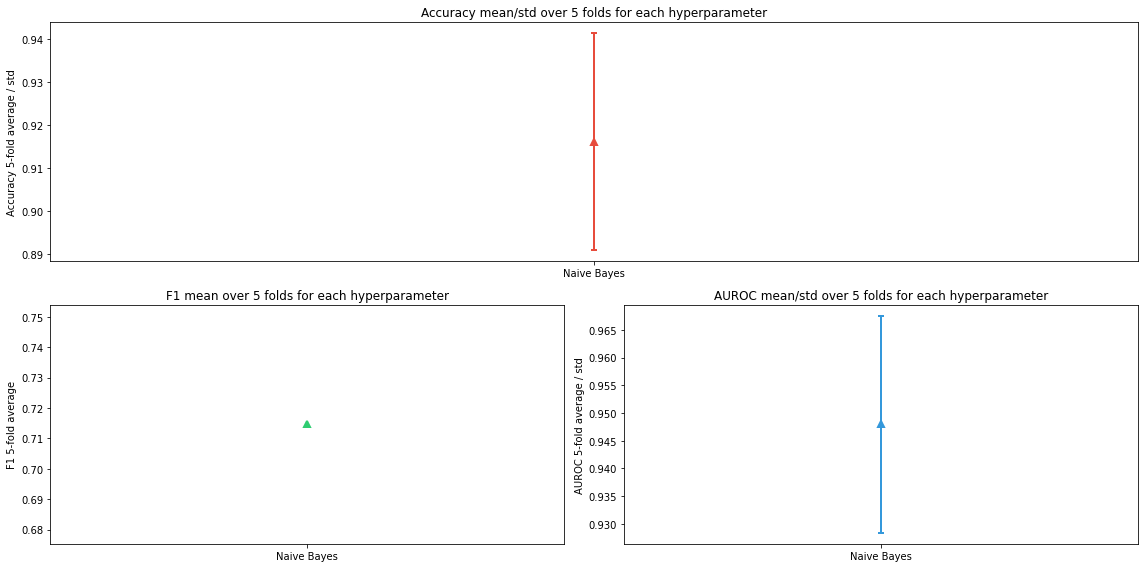

Melhor accuracy médio entre os 5-folds: 0.9161761989211558 com params: {}


In [6]:
from sklearn.naive_bayes import GaussianNB

nb_metrics = evaluate_model_variations(GaussianNB, None, norm_ds)
output_variations_info(nb_metrics, ["Naive Bayes"])

Aqui temos o resultado do método de baseline, ele atingiu uma acurácia média nos dados de teste de 91.6%.

### 4.2. Decision tree

As árvores de decisão são simplesmente operações que comparam certos dados de entrada com certos valores aprendidos durante o treinamento e assim separam as instâncias de treino em varios "bins", que serão então separados novamente pelo mesmo processo em cada nível da árvore.

O parâmetro que está sendo alterado aqui é o limite de qual a distância máxima da raíz da árvore até a folha mais distante. Esse parâmetro ajuda a evitar overfitting visto que uma árvore muito profunda tende a criar comparações muito específicas que provavelmente não generalizarão bem em dados novos.

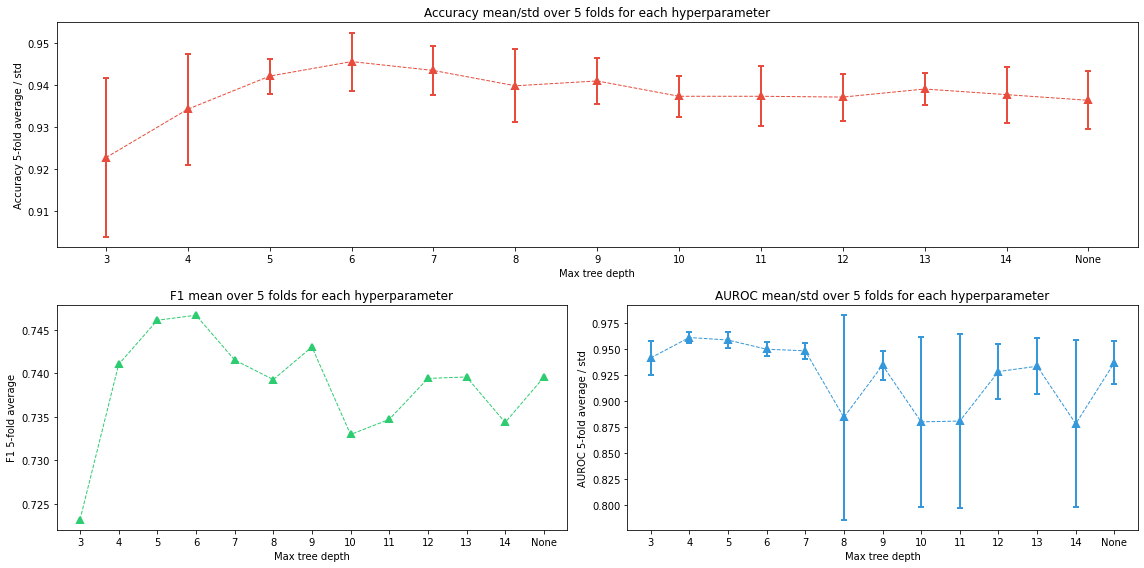

Melhor accuracy médio entre os 5-folds: 0.9455968743072489 com params: {'max_depth': 6}


In [7]:
from sklearn.tree import DecisionTreeClassifier

params = [{"max_depth": h} for h in range(3, 15)] + [{"max_depth": None}]
labels = [p["max_depth"] for p in params[:-1]] + ["None"]

dt_metrics = evaluate_model_variations(DecisionTreeClassifier, params, norm_ds)
output_variations_info(dt_metrics, labels, "Max tree depth")

No experimento acima, usando uma Decision Tree, o melhor modelo que conseguimos foi limitando a profundidade máxima da árvore para 6 nós. Como pode-se ver, com mais profundidade a acurácia começa a cair visto que a partir desse ponto o modelo estará overfittando, ou seja, terão comparações muito específicas criadas para fittar os dados de entrada que não generalizarão bem para os dados de teste.

### 4.3. Support Vector Machines

As support vector machines são algoritmos que tentam dividir os dados por meio de uma linha de decisão da melhor forma possível (tentando deixar a linha de decisão o mais longe possível das instâncias). Além disso, para facilitar a definição dessa linha em dados complexos, um kernel é utilizado e tem o trabalho de separar os dados aplicando uma transformação e assim facilitando a criar a linha de decisão nesses dados transformados.

O parâmetro que está sendo alterado é o kernel do SVM, que corresponde a como o SVM irá transformar os dados no espaço para encontrar uma linha de decisão mais clara.

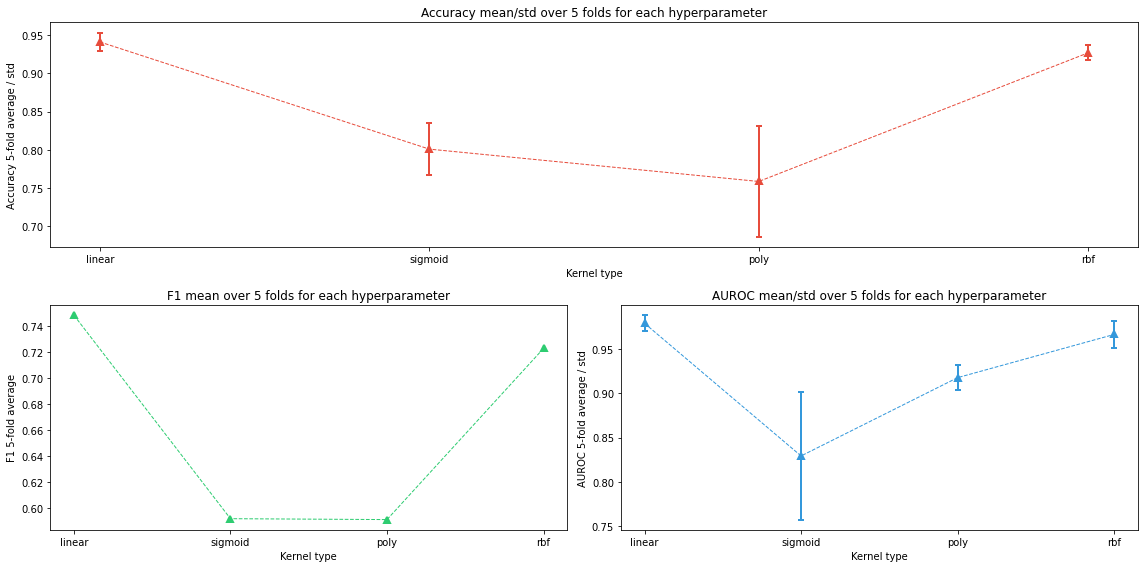

Melhor accuracy médio entre os 5-folds: 0.941175090519471 com params: {'kernel': 'linear', 'probability': True}


In [8]:
from sklearn.svm import SVC

params = [{"kernel": k, "probability": True} for k in ["linear", "sigmoid", "poly", "rbf"]]
labels = [p["kernel"] for p in params]

svm_metrics = evaluate_model_variations(SVC, params, norm_ds)
output_variations_info(svm_metrics, labels, "Kernel type")

No experimento acima tivemos uma acurácia média de aproximadamente 94% com o kernel linear, sendo esse o melhor que foi testado. O resultado pode indicar que os dados não são muito complexos e usando kernels mais complexos, ao invés de facilitar a linha de decisão, acabamos deixando mais difícil de encontra-la, o que pode ser visto também pelo grande desvio padrão relativo da acurácia usando o kernel polinomial e sigmoide.

### 4.4. K-Nearest Neighbors

O KNN é um algoritmo que para definir qual a classe de uma dada instância tenta encontrar as $k$ instâncias mais próximas daquela e, sabendo a classe dessas $k$ instâncias, podemos tentar adivinhar a classe da instância original.

A seguir estão os resultados do KNN usando diversos valores para $k$, ou seja, estamos variando a quantidade de instâncias próximas iremos considerar ao tentar descobrir a classe da instância original. Caso $k$ seja muito grande, ele começará a considerar pontos muito longes do original (e naturalmente sem muita conexão com o ponto original) e caso ele seja muito pequeno, ele será altamente vulnerável a outliers.

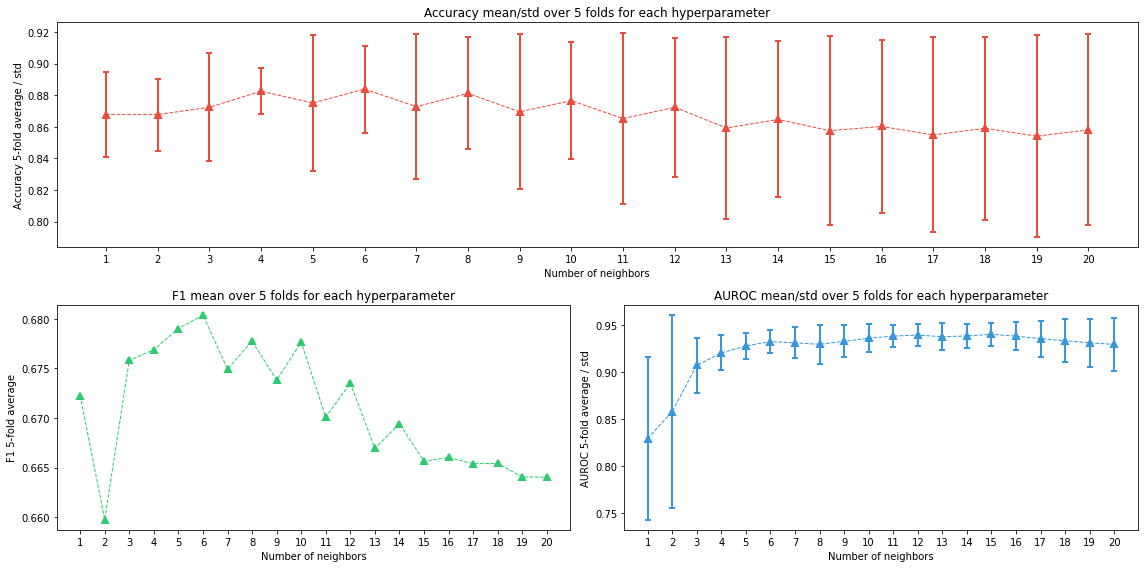

Melhor accuracy médio entre os 5-folds: 0.883882361634523 com params: {'n_neighbors': 6}


In [9]:
from sklearn.neighbors import KNeighborsClassifier

params = [{"n_neighbors": h} for h in range(1, 21, 1)]
labels = [p["n_neighbors"] for p in params]

knn_metrics = evaluate_model_variations(KNeighborsClassifier, params, norm_ds)
output_variations_info(knn_metrics, labels, "Number of neighbors")

Esse método conseguiu com os melhores hiperparametros testados uma acurácia média de aproximadamente 88%. Esse método não se performou bem quando comparado aos outros, provavelmente devido a falta de capacidade do algoritmo de encontrar padrões nos dados, tentando apenas agrupar cada instância a outras próximas.

### 4.5. Random Forest

O algoritmo de random forest implementa diversas árvores de decisão e para chegar no resultado final, o algoritmo pega o resultado dado por todas as árvores e escolhe a opção mais "popular". Note que esse procedimento usa as árvores de forma paralela.

Nesse experimento estamos variando a quantidade de árvores que serão usadas pelo algoritmo. Em geral, quanto mais árvores são usadas, menor é a chance da resposta encontrada ser feita a partir de decisões que são baseadas em correlações espúrias, e assim tendendo a aumentar a generalidade do modelo.

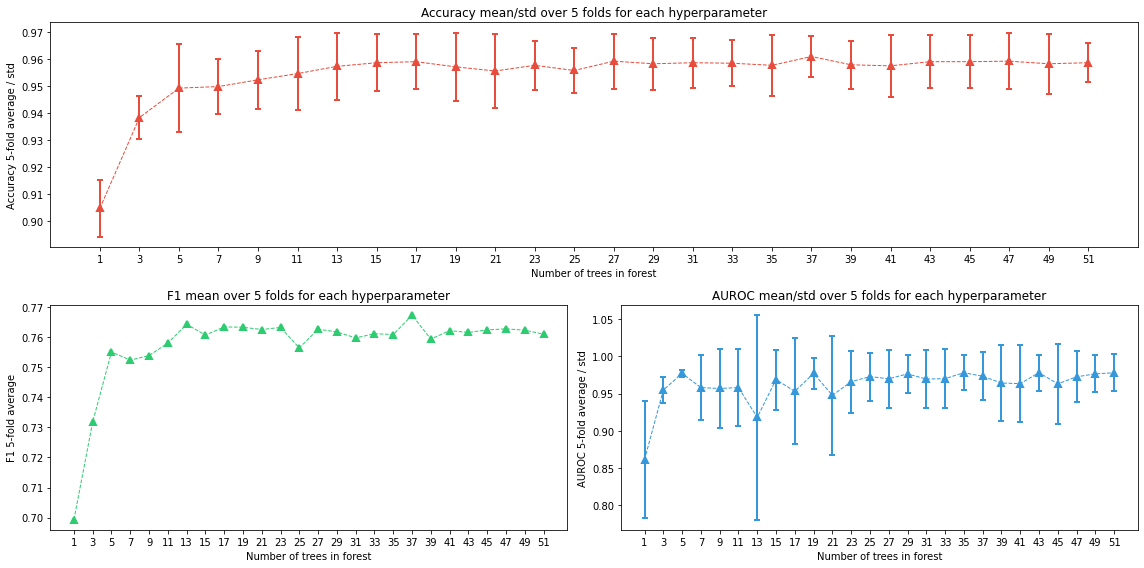

Melhor accuracy médio entre os 5-folds: 0.9609794576221089 com params: {'n_estimators': 37}


In [10]:
from sklearn.ensemble import RandomForestClassifier

params = [{"n_estimators": h} for h in range(1, 52, 2)]
labels = [p["n_estimators"] for p in params]

rf_metrics = evaluate_model_variations(RandomForestClassifier, params, norm_ds)
output_variations_info(rf_metrics, labels, "Number of trees in forest")

A partir desse método, temos um grande avanço na média das acurácias. Aqui tivemos uma acurácia média de aproximadamente 96% com o número de árvores igual a 27. Isso indica que métodos do tipo ensemble se performam bem nesse dataset e que o fato de usarmos múltiplas árvores de decisão (que já teve um resultado bom de 94.5% de acurácia) deixa o algoritmo ainda melhor.

### 4.6. Gradient Tree Boosting

Ao contrário do algoritmo de Random Forest, que utiliza as árvores em paralelo, esse algoritmo utiliza as árvores de decisão em série, ou seja, o resultado de uma árvore (sua função residual) serve de entrada para a próxima. Esse processo tem vantagens sobre o algoritmo do random forest, principalmente pelo fato desse algoritmo também diminuir o bias do modelo.

O parâmetro que está sendo alterado nesse experimento é o número de árvores utilizada em série ao decorrer do modelo, também chamado de "número de iterações".

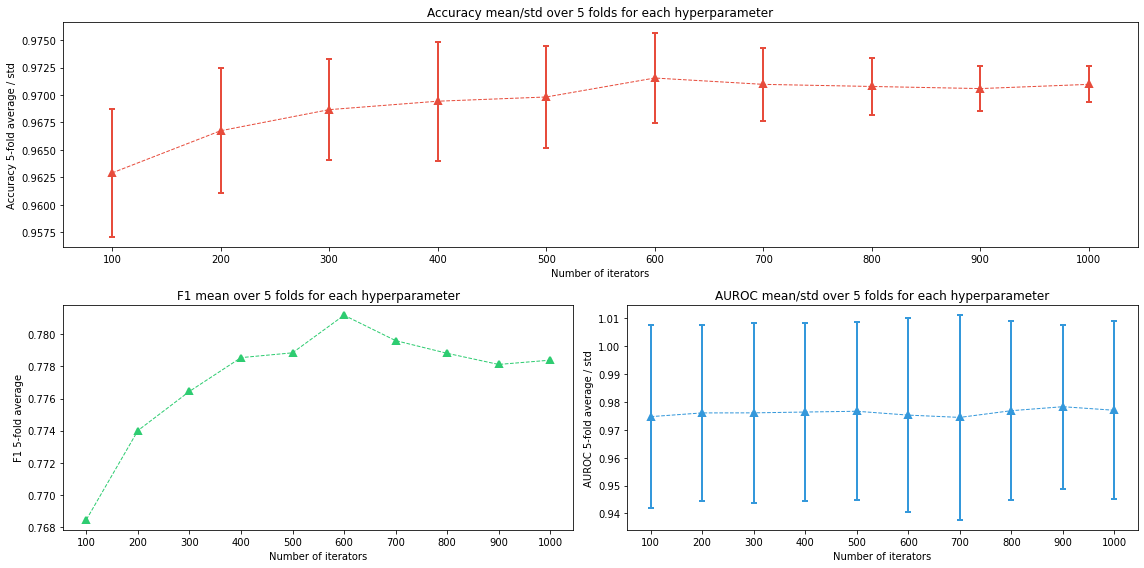

Melhor accuracy médio entre os 5-folds: 0.9715510234242222 com params: {'n_estimators': 600}


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

params = [{"n_estimators": h} for h in range(100, 1001, 100)]
labels = [p["n_estimators"] for p in params]

gb_metrics = evaluate_model_variations(GradientBoostingClassifier, params, norm_ds)
output_variations_info(gb_metrics, labels, "Number of iterators")

Analogamente ao método de Random Forest, observamos os bons resultados aprensentados pelos métodos baseados em ensemble com uma acurácia média de mais de 97%. Isso provavelmente se deve ao poder de concatenar métodos de aprendizado de máquina para que cada unidade tenha que resolver um problema menor para que no total um modelo robusto seja criado.

## 5. Comparação dos resultados

Nessa seção serão comparados os melhores modelos gerados durante os experimentos para cada um dos algoritmos propostos, para que então, possamos chegar a uma conclusão melhor de qual o melhor deles para essa tarefa.

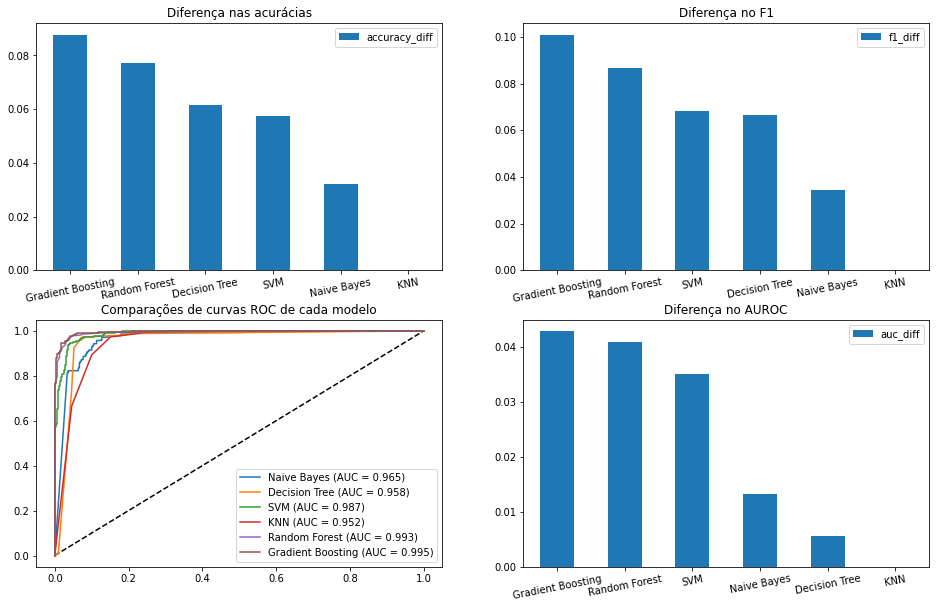

,algorithm,accuracy,f1,precision,recall,auc
5,Gradient Boosting,0.971551,0.781195,0.771047,0.868356,0.995058
4,Random Forest,0.960979,0.767175,0.765444,0.850502,0.993094
2,SVM,0.941175,0.748381,0.736817,0.947416,0.987331
0,Naive Bayes,0.916176,0.714610,0.675045,0.862582,0.965352
1,Decision Tree,0.945597,0.746706,0.733518,0.854474,0.957745
3,KNN,0.883882,0.680362,0.639415,0.937160,0.952153


In [12]:
best_nb = get_best_accuracy_model_metrics(nb_metrics)
best_dt = get_best_accuracy_model_metrics(dt_metrics)
best_svm = get_best_accuracy_model_metrics(svm_metrics)
best_knn = get_best_accuracy_model_metrics(knn_metrics)
best_rf = get_best_accuracy_model_metrics(rf_metrics)
best_gb = get_best_accuracy_model_metrics(gb_metrics)

metrics = [best_nb, best_dt, best_svm, best_knn, best_rf, best_gb]
names = ["Naive Bayes", "Decision Tree", "SVM", "KNN", "Random Forest", "Gradient Boosting"]

data = {
    "algorithm": names,
    "accuracy": [np.mean(m["accuracy"]) for m in metrics],
    "f1": [np.mean(m["f1"]) for m in metrics],
    "precision": [np.mean(m["precision"]) for m in metrics],
    "recall": [np.mean(m["recall"]) for m in metrics],
    "auc": [np.max(m["auc"]) for m in metrics]
}

fig = plt.figure(figsize=(16, 10))
ax = [plt.subplot(2, 2, 1), plt.subplot(2, 2, 2), plt.subplot(2, 2, 3), plt.subplot(2, 2, 4)]

# Plot das acurácias
df = pd.DataFrame(data=data).sort_values("accuracy", ascending=False)
df["accuracy_diff"] = df["accuracy"] - np.min(df["accuracy"])
df.plot.bar(x="algorithm", y="accuracy_diff", rot=11, xlabel="", title="Diferença nas acurácias", ax=ax[0])

# Plot dos F1
df = pd.DataFrame(data=data).sort_values("f1", ascending=False)
df["f1_diff"] = df["f1"] - np.min(df["f1"])
df.plot.bar(x="algorithm", y="f1_diff", rot=11, xlabel="", title="Diferença no F1", ax=ax[1])

# Plot dos AUROC
df = pd.DataFrame(data=data).sort_values("auc", ascending=False)
df["auc_diff"] = df["auc"] - np.min(df["auc"])
df.plot.bar(x="algorithm", y="auc_diff", rot=11, xlabel="", title="Diferença no AUROC", ax=ax[3])

# Plot dos ROC
ax[2].plot([0, 1], [0, 1], 'k--')
for i, m in enumerate(metrics):
    best_roc_i = np.argmax(m["auc"])
    auc_label = names[i] + " (AUC = " + str(round(m["auc"][best_roc_i], 3)) + ")"
    ax[2].plot(m["roc"][best_roc_i][0], m["roc"][best_roc_i][1], label=auc_label)
ax[2].set_title("Comparações de curvas ROC de cada modelo")    
ax[2].legend(loc="lower right")

plt.show()
df.iloc[:,:-1]

## 6. Conclusão

Como pode ser visto pelos gráficos e pela tabela mostrada na seção anterior, vemos uma clara vantagem dos algoritmos baseados em ensemble (Random Forest e Gradient Tree Boosting) em relação aos outros algoritmos, com o Gradient Tree Boosting sendo o melhor de todos. Isso acontece pois uma combinação de vários modelos conseguem, em geral, tratar os dados de forma mais genérica, princiapalmente em tarefas de classificação como a aprensentada aqui.

No meio da tabela, temos os algoritmos Support Vector Machines e Decision Trees. Ambos são modelos baseados em transformar os dados de forma a facilitar uma linha de decisão, no caso do SVM essa trasnformação acontece por meio de um kernel e no caso da árvore de decisão por meio de um separação dos dados em dois grupos em cada nó da árvore.

No fim da tabela temos os dois piores métodos para a tarefa que são o Naive Bayes e o KNN. O Naive Bayes é um método simples que utiliza probabilidade para tentar predizer os dados, e devido a baixa capacidade do modelo, ele não se saiu muito bem. Já o KNN se baseia em proximidade geométrica e não tem nenhum mecanismo estatístico para encontrar padrões nos dados, o levando ao fracasso nesse caso.

Caso quisessemos apenas o melhor modelo, o Gradient Boosting com 97% de acurácia nos dados de teste com certeza seria o método escolhido, porém é interessante explorar também o modelo de Decision Tree visto que com uma profundidade de apenas 5~6 nós, é possível conseguir um valor de acurácia bem razoável (de aproximadamente 94%) e ainda ter o benefício de um modelo onde explicar os passos tomados para chegar nessa decisão é trivial devido a natureza do algoritmo, o que muitas vezes é algo não só útil mas necessário.